## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read data

In [2]:
data = pd.read_csv('dataset/german_credit_data.csv', index_col=0)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'german_credit_data.csv'

## EDA

#### Check info of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


#### Check missing value of features

In [ ]:
for col in data.columns:
  missing_data = data[col].isna().sum()
  missing_percent = missing_data/len(data) * 100
  print(f"Column {col}: has {missing_percent}%")

Column Age: has 0.0%
Column Sex: has 0.0%
Column Job: has 0.0%
Column Housing: has 0.0%
Column Saving accounts: has 18.3%
Column Checking account: has 39.4%
Column Credit amount: has 0.0%
Column Duration: has 0.0%
Column Purpose: has 0.0%
Column Risk: has 0.0%


In [ ]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
data.describe(include='O')

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


#### Change type of feature

In [ ]:
def change_type_to_categorical(data, col):
    data[col] = data[col].astype('category')

category_col = ['Job', 'Sex' ,'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in category_col:
    change_type_to_categorical(data, col)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving accounts   817 non-null    category
 5   Checking account  606 non-null    category
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
 9   Risk              1000 non-null   object  
dtypes: category(6), int64(3), object(1)
memory usage: 46.1+ KB


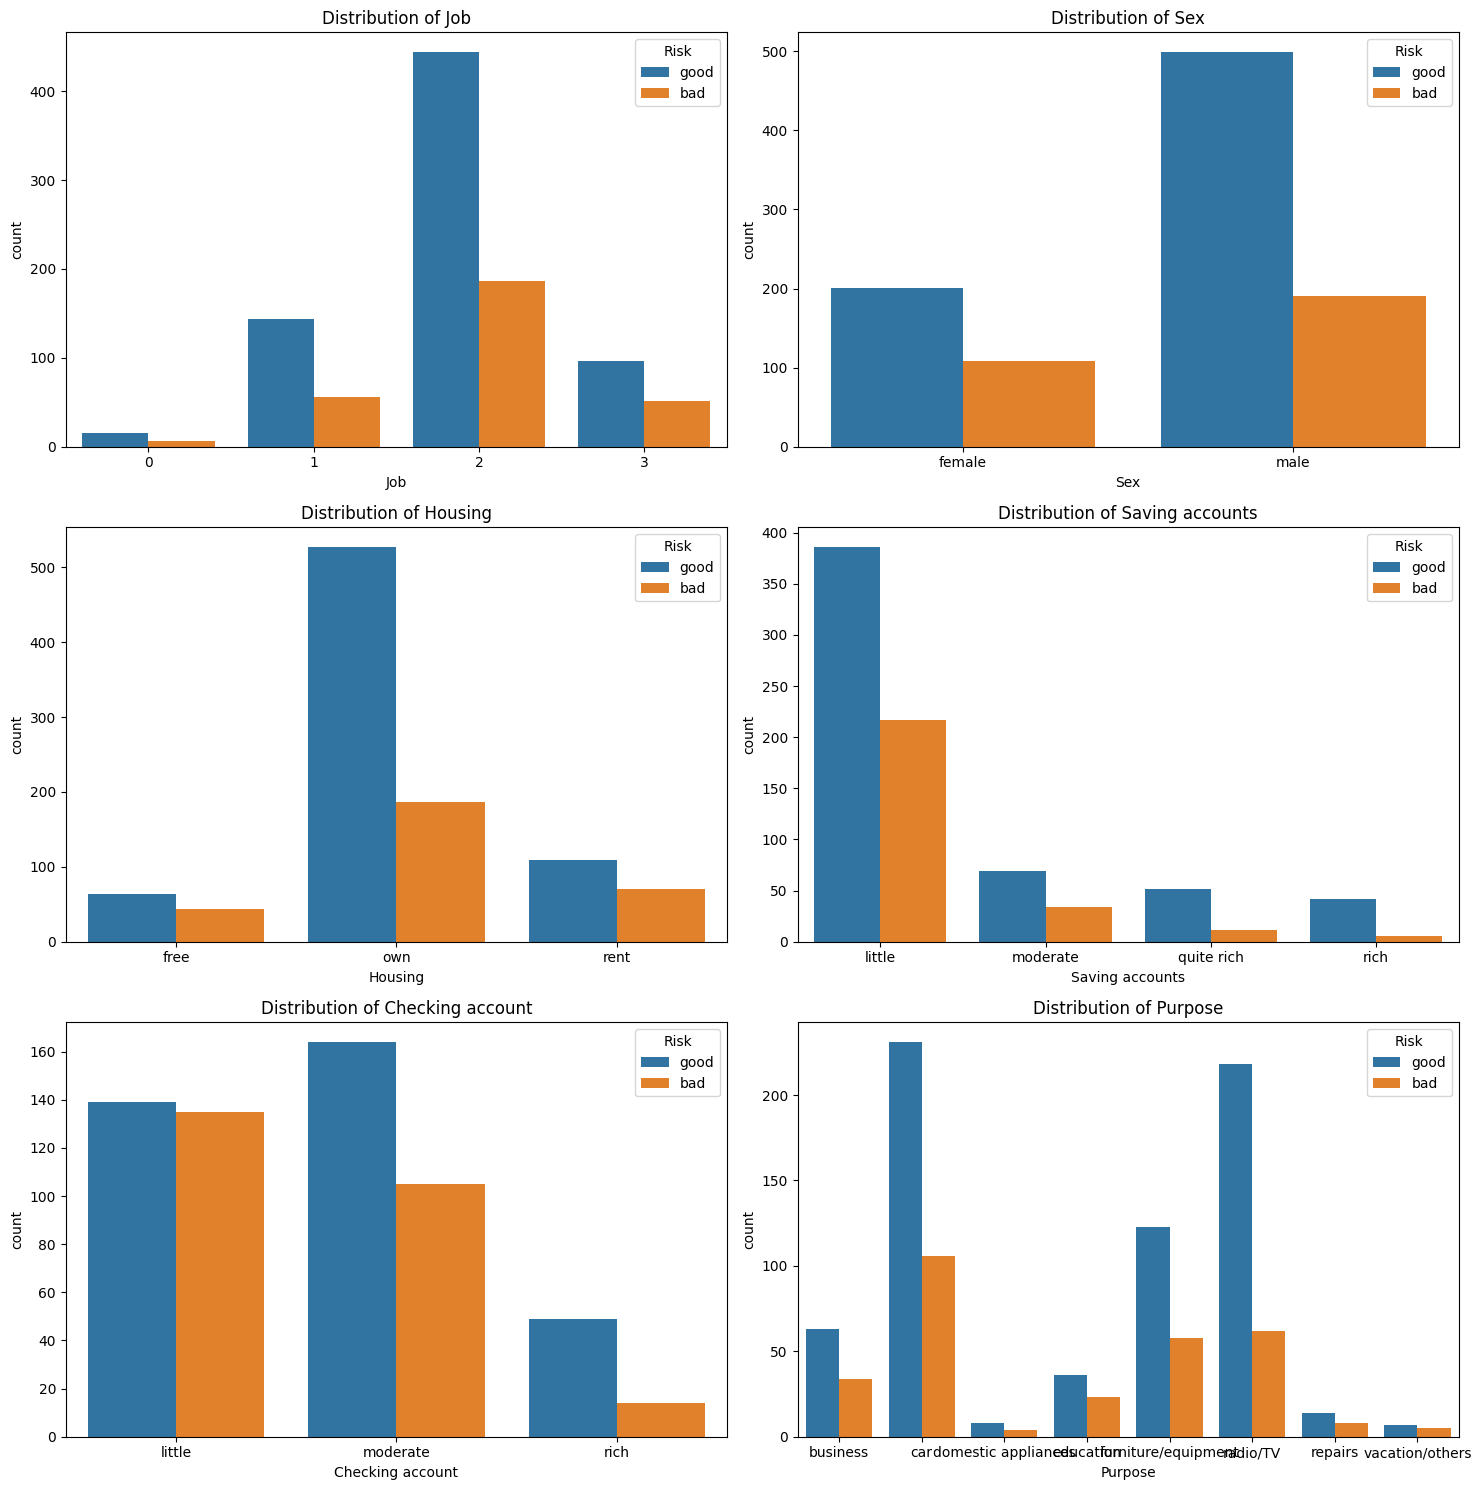

In [ ]:
def plot_distribution(data, col, ax):
    sns.countplot(x=col, data=data, ax=ax, hue='Risk')
    ax.set_title(f"Distribution of {col}")

fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax = ax.flatten()
for i, col in enumerate(category_col):
    plot_distribution(data, col, ax[i])
plt.tight_layout()


In [ ]:
data['Purpose'] = data['Purpose'].replace(['radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others'], ['household', 'household', 'household', 'car', 'business', 'household', 'household', 'household'])

In [ ]:
data['Purpose'].value_counts().to_frame()

,count
Purpose,
household,566
car,337
business,97


C:\Users\vanhu\AppData\Local\Temp\ipykernel_276\1047092939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax)
C:\Users\vanhu\AppData\Local\Temp\ipykernel_276\1047092939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax)
C:\Users\vanhu\AppData\Local\Temp\ipyk

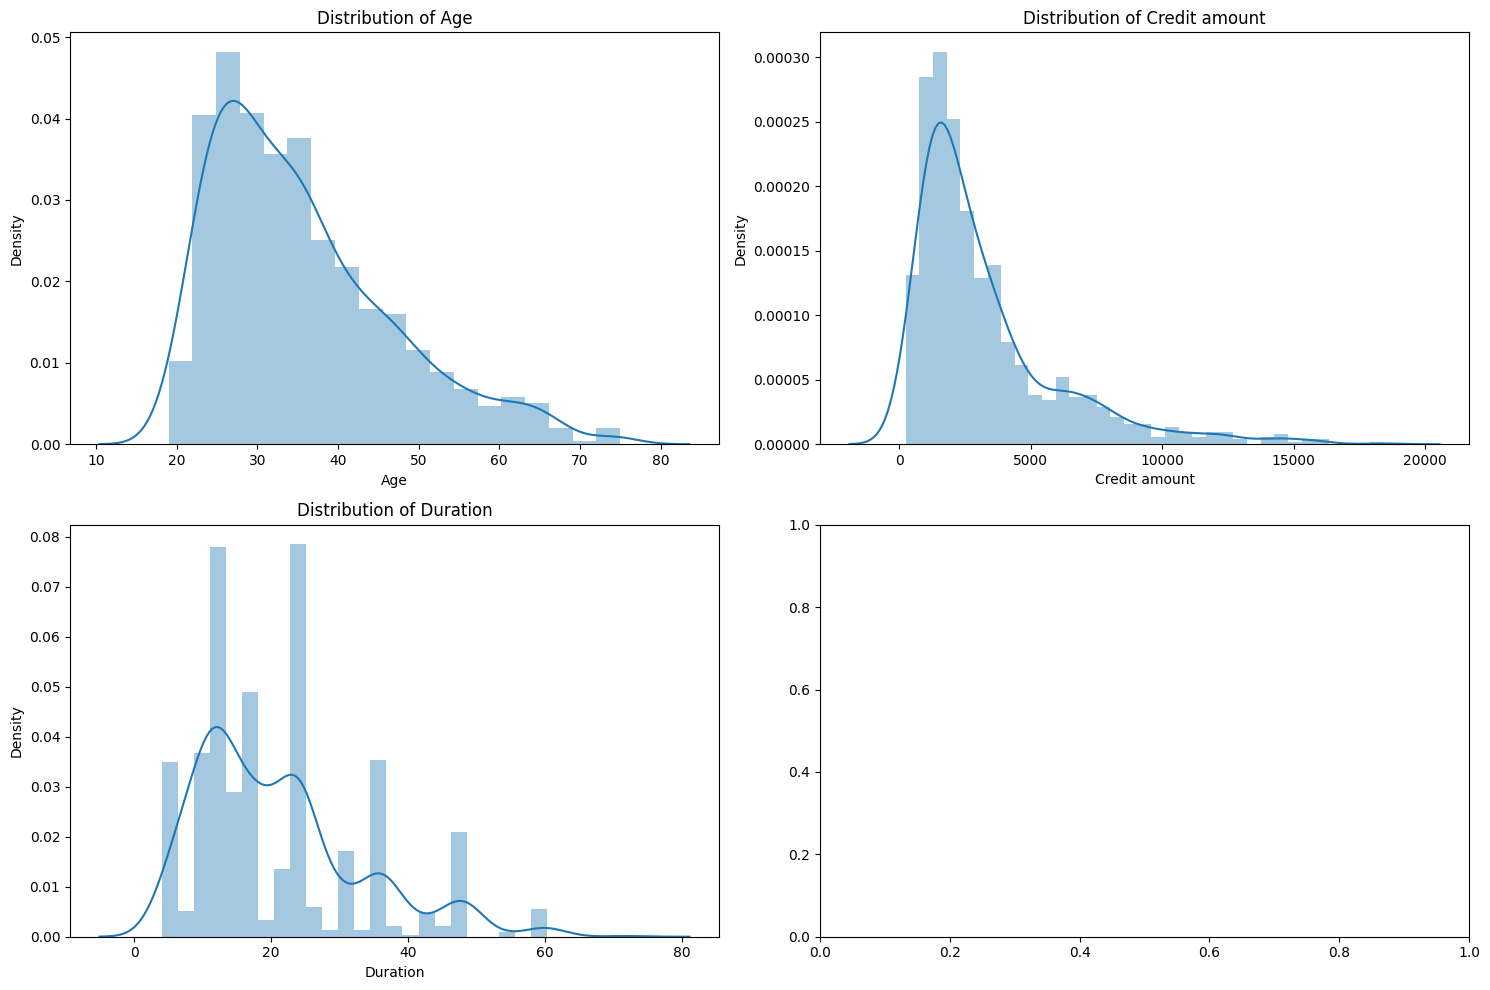

In [ ]:
def plot_numerical(data, col, ax):
    sns.distplot(data[col], ax=ax)
    ax.set_title(f"Distribution of {col}")

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plot_numerical(data, col, ax[i])

plt.tight_layout()

In [ ]:
data['Risk'].value_counts().to_frame()

,count
Risk,
good,700
bad,300


In [ ]:
data['Risk'].value_counts(normalize=True).to_frame()

,proportion
Risk,
good,0.7
bad,0.3


## Filling missing value

In [ ]:
def display_missing(data):
    for col in data.columns:
        missing_data = data[col].isna().sum()
        missing_percent = missing_data/len(data) * 100
        print(f"Column {col}: has {missing_percent}%")

In [ ]:
display_missing(data)

Column Age: has 0.0%
Column Sex: has 0.0%
Column Job: has 0.0%
Column Housing: has 0.0%
Column Saving accounts: has 18.3%
Column Checking account: has 39.4%
Column Credit amount: has 0.0%
Column Duration: has 0.0%
Column Purpose: has 0.0%
Column Risk: has 0.0%


In [ ]:
data['Saving accounts'].value_counts().to_frame()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


In [ ]:
data['Checking account'].value_counts().to_frame()

,count
Checking account,
little,274
moderate,269
rich,63


In [ ]:
data['Checking account'] = data.groupby(['Housing','Job'])['Checking account'].transform(lambda x: x.fillna(x.value_counts().index[0]))
data['Saving accounts'] = data.groupby(['Housing','Job'])['Saving accounts'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
data['Age_Cat'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['Young', 'Young Adult', 'Adult', 'Middle Age', 'Old'])

In [ ]:
change_type_to_categorical(data, 'Age_Cat')
data.drop('Age', axis=1, inplace=True)

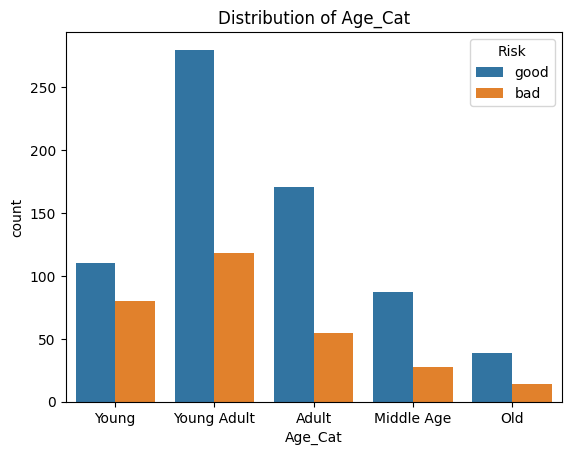

In [ ]:
plot_distribution(data, 'Age_Cat', ax=plt.gca())

In [ ]:
data['Age_Cat'].value_counts().to_frame()

,proportion
Age_Cat,
Young Adult,0.405295
Adult,0.230143
Young,0.193483
Middle Age,0.117108
Old,0.053971


## Fearture Wranging

In [ ]:
numeric_col = ['Credit amount', 'Duration']
category_col = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_Cat']

columns = numeric_col + category_col

print(columns)

['Credit amount', 'Duration', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_Cat']


In [ ]:
X = data[columns]
y = data['Risk']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

category_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_col),
        ('cat', category_transformer, category_col)])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Credit amount', 'Duration']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Job', 'Housing', 'Saving accounts',
                                  'Checking account', 'Purpose', 'Risk',
                                  'Age_Cat'])])

In [ ]:
X = preprocessor.transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
X.shape

(1000, 28)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42)


In [ ]:
print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (562, 28)
Validation shape: (188, 28)
Test shape: (250, 28)


## Trainning model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = knn.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1: {f1_score(y_val, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}")
print(f"Classification Report: \n{classification_report(y_val, y_pred)}")


Accuracy: 0.9787234042553191
Precision: 0.9776119402985075
Recall: 0.9924242424242424
F1: 0.9849624060150376
Confusion Matrix: 
[[ 53   3]
 [  1 131]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.98      0.99      0.98       132

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(f"Best Score: {knn_cv.best_score_}")
print(f"Best Parameters: {knn_cv.best_params_}")



Best Score: 0.9804519595448798
Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


In [ ]:
knn_cv.best_estimator_.fit(X_train, y_train)
y_pred = knn_cv.best_estimator_.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1: {f1_score(y_val, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}")
print(f"Classification Report: \n{classification_report(y_val, y_pred)}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion Matrix: 
[[ 56   0]
 [  0 132]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       132

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [ ]:
y_pred_test = knn_cv.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall: {recall_score(y_test, y_pred_test)}")
print(f"F1: {f1_score(y_test, y_pred_test)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_test)}")


Accuracy: 0.992
Precision: 0.9942857142857143
Recall: 0.9942857142857143
F1: 0.9942857142857143
Confusion Matrix: 
[[ 74   1]
 [  1 174]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.99      0.99      0.99       175

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

